### Importing Requried libraries and loading Data

In [1]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv(r'C:\Users\gopik\Downloads/data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


### Check there are any null values and outliers in the data

In [49]:
df.shape

(2227, 3)

In [50]:
df.x1.value_counts()

-118.366669    8
 31.633331     6
 30.633331     5
 78.633331     5
-86.366669     5
              ..
 58.434396     1
 18.408090     1
-99.593049     1
-72.501026     1
 54.003740     1
Name: x1, Length: 1887, dtype: int64

In [51]:
df.x2.value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-119.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

In [52]:
df.x1.isnull().sum()

5

In [53]:
df.x2.isnull().sum()

3

#### very less amount of null values removing them from the data won't show any impact

In [54]:
df.dropna(how='any',axis=0,inplace=True)

In [55]:
df.x1.isnull().sum()

0

In [56]:
df.x2.isnull().sum()

0

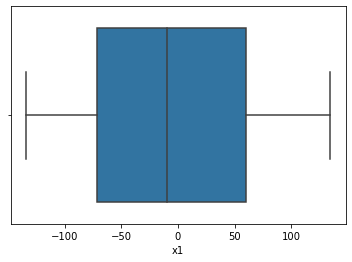

In [57]:
sns.boxplot(x='x1',data=df)

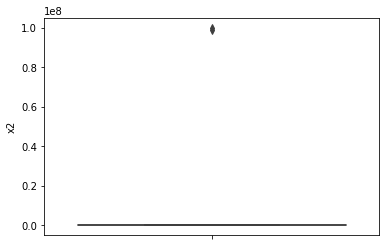

In [58]:
sns.boxplot(y='x2',data=df)

#### very less amount of outliers so just ignore them they won't impact on data 

In [59]:
df.y.value_counts()

0    1238
1     981
Name: y, dtype: int64

### Data Visualization

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

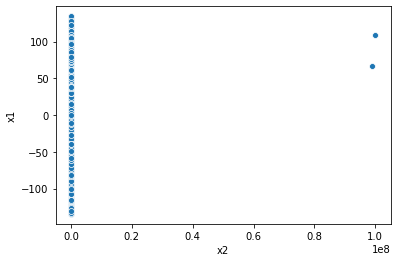

In [61]:
sns.scatterplot(x='x2',y='x1',data=df)

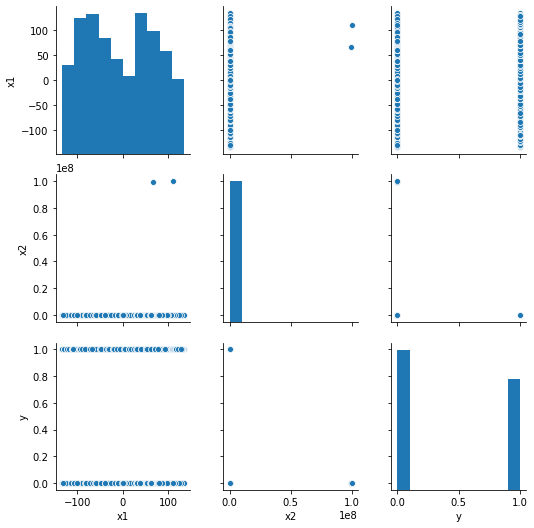

In [62]:
sns.pairplot(df)

### Standardizing and Spliting Data

In [63]:
target=df['y']
df=df.drop('y',axis=1)

In [64]:
df.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [72]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(df)
print(standardized_data)

[[-1.52953452e+00 -2.99941733e-02]
 [-1.28583072e+00 -2.99999411e-02]
 [-1.67518040e+00 -2.99969302e-02]
 ...
 [ 1.20720924e+00 -2.99979109e-02]
 [ 1.11758091e+00 -3.00063617e-02]
 [ 1.52687860e+00  3.34595047e+01]]


In [73]:
new_df=pd.DataFrame(standardized_data,columns=df.columns)
new_df.head()

,x1,x2
0,-1.529535,-0.029994
1,-1.285831,-0.030000
2,-1.675180,-0.029997
3,-1.467293,-0.029999
4,-1.529535,-0.029994


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df,target,test_size=0.20,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1775, 2) (1775,)
(444, 2) (444,)


### Hyperparameter Tuning and Model Buliding
 - LogisticRegression
 - Decision Tree
 - KNN
 - SVM with Linear Kernel
 - SVM with RBF Kernel

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [77]:
import warnings
warnings.filterwarnings('ignore')

#### LogisticRegression

In [78]:
tunded_parameters=[{'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'penalty':['l1','l2','elasticnet'],'C':[1.0,2.0,5.0]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf=RandomizedSearchCV(LogisticRegression(),tunded_parameters,scoring='{}'.format(i))
    clf.fit(x_train,y_train)
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()
    print(clf.score(x_test,y_test))

Best parameters set found on train set:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
LogisticRegression()

0.5968468468468469
Best parameters set found on train set:
{'solver': 'saga', 'penalty': 'l2', 'C': 2.0}
LogisticRegression(C=2.0, solver='saga')

0.62
Best parameters set found on train set:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 5.0}
LogisticRegression(C=5.0)

0.3069306930693069


In [92]:
model=LogisticRegression(C=2.0, solver='saga',penalty='l2')
model.fit(x_train,y_train)

LogisticRegression(C=2.0, solver='saga')

In [93]:
logistic_predict=model.predict(x_test)

In [97]:
predictions_of_logistic=pd.DataFrame({'y_actual':y_test,'y_predict':logistic_predict})
predictions_of_logistic.head()

,y_actual,y_predict
1375,0,0
101,1,0
1281,0,0
579,1,0
40,1,1


### Performance Metrics
 - Accuracy_Score
 - ROC_AUC_Score
 - ROC_AUC_Curve

In [100]:
from sklearn import metrics
metrics.accuracy_score(y_test,logistic_predict)

0.5990990990990991

In [103]:
prob=model.predict_proba(x_test)
prob=prob[:,1]
roc_auc=metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.5847516569838802


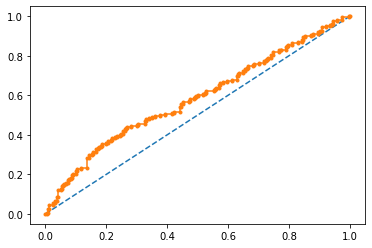

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
tunded_parameters=[{'max_depth':[1,2,3]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf_1=RandomizedSearchCV(DecisionTreeClassifier(),tunded_parameters,scoring='{}'.format(i))
    clf_1.fit(x_train,y_train)
    print("Best parameters set found on train set:")
    print(clf_1.best_params_)
    print(clf_1.best_estimator_)
    print()
    print(clf_1.score(x_test,y_test))

Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.8355855855855856
Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.9387755102040817
Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.6831683168316832


In [106]:
model_2=DecisionTreeClassifier(max_depth=3)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [107]:
predict_dt=model_2.predict(x_test)

In [108]:
predictions_of_dt=pd.DataFrame({'y_actual':y_test,'y_predict':predict_dt})
predictions_of_dt.head()

,y_actual,y_predict
1375,0,0
101,1,1
1281,0,0
579,1,0
40,1,1


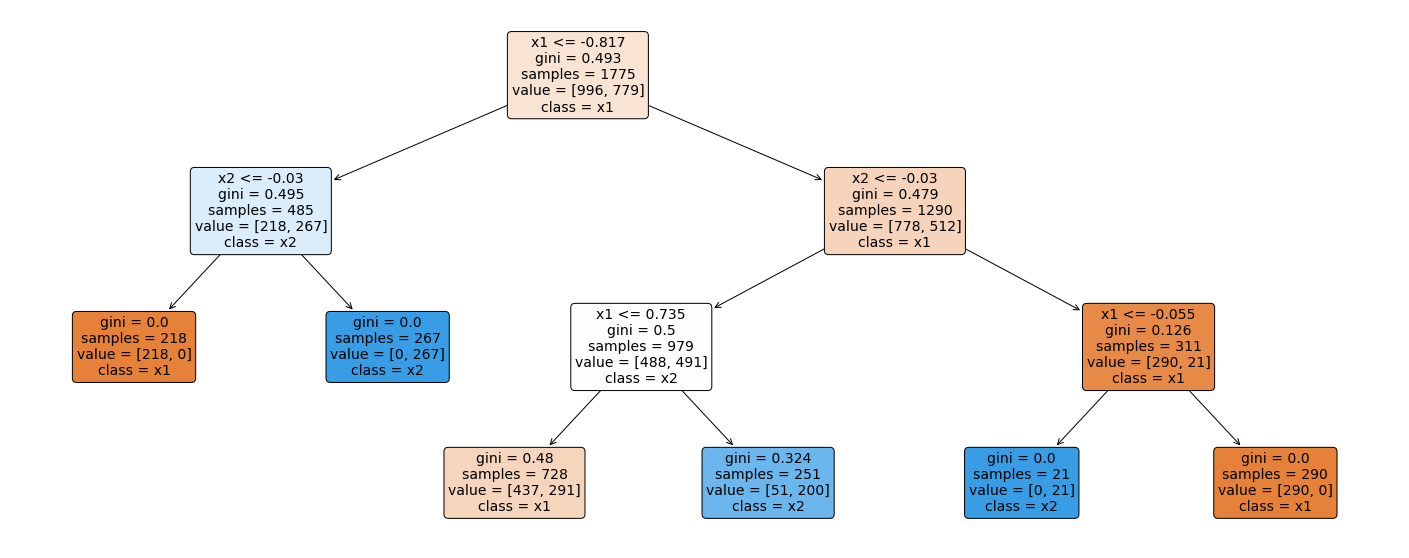

In [140]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(model_2, feature_names = x_train.columns, 
              class_names = ['x1','x2'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

### Performance Metrics
 - Accuracy_Score
 - ROC_AUC_Score
 - ROC_AUC_Curve

In [109]:
metrics.accuracy_score(y_test,predict_dt)

0.8355855855855856

In [110]:
prob=model_2.predict_proba(x_test)
prob=prob[:,1]
roc_auc=metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.9191862368054988


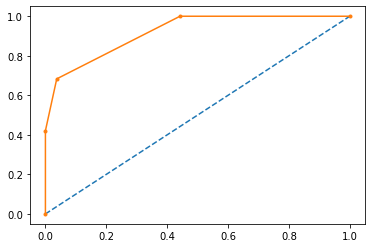

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### KNeighborsClassifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
tunded_parameters=[{'n_neighbors':[2,3,5],'p':[1,2,3]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf_2=RandomizedSearchCV(KNeighborsClassifier(),tunded_parameters,scoring='{}'.format(i))
    clf_2.fit(x_train,y_train)
    print("Best parameters set found on train set:")
    print(clf_2.best_params_)
    print(clf_2.best_estimator_)
    print()
    print(clf_2.score(x_test,y_test))

Best parameters set found on train set:
{'p': 1, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=1)

0.5472972972972973
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=1)

0.5060240963855421
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)

0.40594059405940597


In [113]:
model_3=KNeighborsClassifier(p=1,n_neighbors=2)
model_3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [114]:
predict_knn=model_3.predict(x_test)

In [115]:
predictions_of_knn=pd.DataFrame({'y_actual':y_test,'y_predict':predict_knn})
predictions_of_knn.head()

,y_actual,y_predict
1375,0,1
101,1,0
1281,0,0
579,1,0
40,1,1


### Performance Metrics
 - Accuracy_Score
 - ROC_AUC_Score
 - ROC_AUC_Curve

In [116]:
metrics.accuracy_score(y_test,predict_knn)

0.5472972972972973

In [117]:
prob=model_3.predict_proba(x_test)
prob=prob[:,1]
roc_auc=metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.5706672940021275


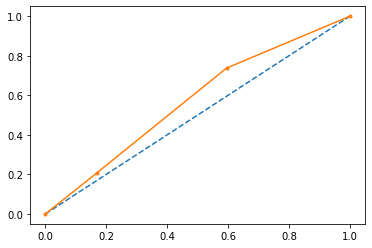

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### Support Vector Machine

In [86]:
from sklearn.svm import SVC

In [119]:
tunded_parameters=[{'C':[1,10,20],'kernel':['rbf'],'gamma':np.random.rand(3)},{'C':[1,10,20],'kernel':['linear']}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf_3=RandomizedSearchCV(SVC(),tunded_parameters,scoring='{}'.format(i))
    clf_3.fit(x_train,y_train)
    print("Best parameters set found on train set:")
    print(clf_3.best_params_)
    print(clf_3.best_estimator_)
    print()
    print(clf_3.score(x_test,y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.32411467510690606, 'C': 10}
SVC(C=10, gamma=0.32411467510690606)

0.5968468468468469
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.32411467510690606, 'C': 10}
SVC(C=10, gamma=0.32411467510690606)

0.5934959349593496
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.9505295546696592, 'C': 1}
SVC(C=1, gamma=0.9505295546696592)

0.37623762376237624


In [124]:
model_4=SVC(C=10,kernel='rbf',gamma=0.324,probability=True)
model_4.fit(x_train,y_train)

SVC(C=10, gamma=0.324, probability=True)

In [134]:
predict_svc_rbf=model_4.predict(x_test)

In [135]:
predictions_of_svc_rbf=pd.DataFrame({'y_actual':y_test,'y_predict':predict_svc_rbf})
predictions_of_svc_rbf.head()

,y_actual,y_predict
1375,0,0
101,1,1
1281,0,0
579,1,0
40,1,1


### Performance Metrics
 - Accuracy_Score
 - ROC_AUC_Score
 - ROC_AUC_Curve

In [136]:
metrics.accuracy_score(y_test,predict_svc_rbf)

0.5968468468468469

In [127]:
prob=model_4.predict_proba(x_test)
prob=prob[:,1]
roc_auc=metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.5798420751166026


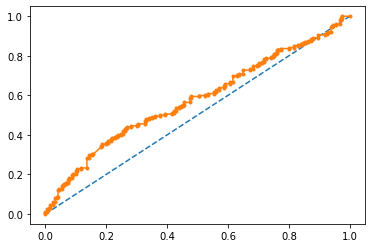

In [128]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [129]:
model_5=SVC(C=10,kernel='linear',probability=True)
model_5.fit(x_train,y_train)

SVC(C=10, kernel='linear', probability=True)

In [132]:
predict_svc_linear=model_5.predict(x_test)

In [133]:
predictions_of_svc_linear=pd.DataFrame({'y_actual':y_test,'y_predict':predict_svc_linear})
predictions_of_svc_linear.head()

,y_actual,y_predict
1375,0,0
101,1,0
1281,0,0
579,1,0
40,1,0


### Performance Metrics
 - Accuracy_Score
 - ROC_AUC_Score
 - ROC_AUC_Curve

In [137]:
metrics.accuracy_score(y_test,predict_svc_linear)

0.545045045045045

In [138]:
prob=model_5.predict_proba(x_test)
prob=prob[:,1]
roc_auc=metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.4154938221094836


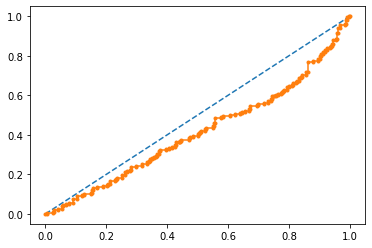

In [139]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### Observation
   - when compare to the other models DecisionTreeClassifier got an good accuracy
   - Because if you see the data we can't use logistic regression if we fit a line it won't gives accurate predictions because      there is more noise in the data
   - the data points are two close we can't use KNN we get worng predictions because it try to caluculate distance of  k            nearest data points and then goes for the majorty voting
   - DecisionTree will calculate the information gain of each feature and gets an tree with pure nodes to predict the class of future data            points 